# Experiement: First Round | 1%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_1.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  30046  23540       1     159    76.0    140     80            3     1   
1  21181  19990       2     150    61.0    130     80            3     3   
2  93860  23438       2     175    70.0    150     90            1     1   
3  76954  19659       1     155    78.0    120     80            1     2   
4  65476  17368       2     173   109.0    150    100            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      1     1       0       1  
3      0     1       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           35039 non-null  int64  
 1   age          35039 non-null  int64  
 2   gender       35039 non-null  int64  
 3   height       35039 non-null  int64  
 4   weight       35039 non-null  float64
 5   ap_hi        35039 non-null  int64  
 6   ap_lo        35039 non-null  int64  
 7   cholesterol  35039 non-null  int64  
 8   gluc         35039 non-null  int64  
 9   smoke        35039 non-null  int64  
 10  alco         35039 non-null  int64  
 11  active       35039 non-null  int64  
 12  cardio       35039 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.5 MB


0    34679
1      360
Name: cardio, dtype: int64

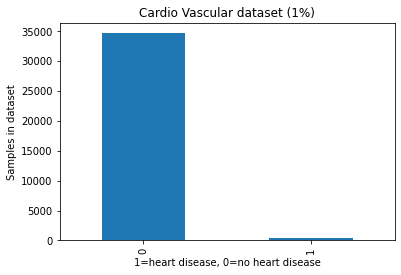

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 360/35039 = 0,0102743

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
24328  69319  15985       1     168    62.0    120     80            1     1   
21437  61145  19070       1     155    92.0    140     90            2     1   
22190  63264  18094       1     154    73.0    110     70            1     1   
19560  55685  18975       1     164    52.0    120     80            1     1   
8103   22848  15971       2     162    80.0    120     80            1     1   

       smoke  alco  active  
24328      0     0       1  
21437      0     0       0  
22190      0     0       1  
19560      0     0       0  
8103       0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       0.00      0.00      0.00       288

    accuracy                           0.99     28031
   macro avg       0.49      0.50      0.50     28031
weighted avg       0.98      0.99      0.98     28031



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.17      0.01      0.03        72

    accuracy                           0.99      7008
   macro avg       0.58      0.51      0.51      7008
weighted avg       0.98      0.99      0.98      7008



In [8]:
X_test.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
31214  88944  18774       1     164    64.0    130     80            1     1   
16247  46059  23206       2     167    71.0    110     60            1     1   
20381  58092  16578       1     157    85.0    120     80            1     3   
32326  92271  20625       2     168    72.0    120     80            1     1   
30416  86625  19757       1     150    65.0    130     70            2     1   

       smoke  alco  active  
31214      0     0       1  
16247      0     0       1  
20381      0     0       1  
32326      0     0       1  
30416      0     0       1

In [9]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
24328  69319  15985       1     168    62.0    120     80            1     1   
21437  61145  19070       1     155    92.0    140     90            2     1   
22190  63264  18094       1     154    73.0    110     70            1     1   
19560  55685  18975       1     164    52.0    120     80            1     1   
8103   22848  15971       2     162    80.0    120     80            1     1   

       smoke  alco  active  
24328      0     0       1  
21437      0     0       0  
22190      0     0       1  
19560      0     0       0  
8103       0     0       1

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.659


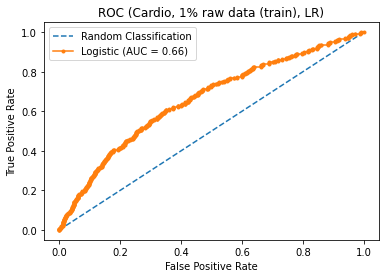

In [10]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.614


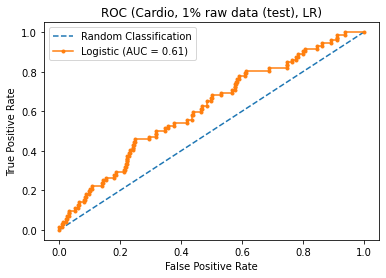

In [11]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       1.00      0.00      0.01       288

    accuracy                           0.99     28031
   macro avg       0.99      0.50      0.50     28031
weighted avg       0.99      0.99      0.98     28031



In [13]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.120


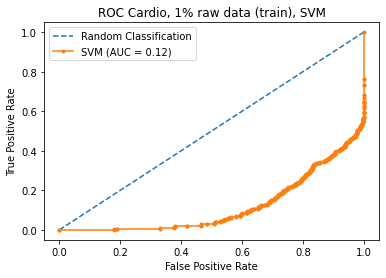

In [14]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


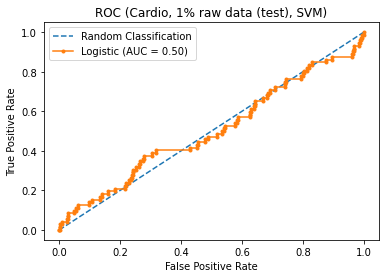

In [15]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [16]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [17]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.01024	validation_0-logloss:0.60183	validation_1-error:0.01042	validation_1-logloss:0.60195
[1]	validation_0-error:0.01024	validation_0-logloss:0.52719	validation_1-error:0.01042	validation_1-logloss:0.52729
[2]	validation_0-error:0.01020	validation_0-logloss:0.46504	validation_1-error:0.01042	validation_1-logloss:0.46516
[3]	validation_0-error:0.01027	validation_0-logloss:0.41260	validation_1-error:0.01027	validation_1-logloss:0.41274
[4]	validation_0-error:0.01027	validation_0-logloss:0.36784	validation_1-error:0.01027	validation_1-logloss:0.36803
[5]	validation_0-error:0.01027	validation_0-logloss:0.32942	validation_1-error:0.01027	validation_1-logloss:0.32965
[6]	validation_0-error:0.01027	validation_0-logloss:0.29619	validation_1-error:0.01027	validation_1-logloss:0.29645
[7]	validation_0-error:0.01027	validation_0-logloss:0.26723	validation_1-error:0.01027	validation_1-logloss:0.26756
[8]	validation_0-error:0.01027	validation_0-logloss:0.24194	validation_1

CPU times: user 2.83 s, sys: 110 ms, total: 2.94 s
Wall time: 2.38 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       0.00      0.00      0.00       288

    accuracy                           0.99     28031
   macro avg       0.49      0.50      0.50     28031
weighted avg       0.98      0.99      0.98     28031



In [19]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.855


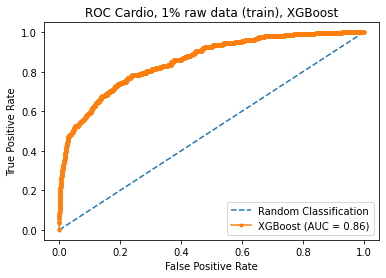

In [20]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.761


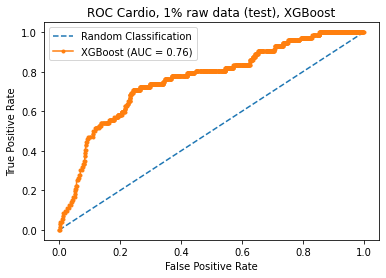

In [21]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [22]:
df_train = X_train
df_train['cardio'] = y_train

In [23]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
24328  69319  15985       1     168    62.0    120     80            1     1   
21437  61145  19070       1     155    92.0    140     90            2     1   
22190  63264  18094       1     154    73.0    110     70            1     1   
19560  55685  18975       1     164    52.0    120     80            1     1   
8103   22848  15971       2     162    80.0    120     80            1     1   

       smoke  alco  active  cardio  
24328      0     0       1       0  
21437      0     0       0       0  
22190      0     0       1       0  
19560      0     0       0       0  
8103       0     0       1       0


### SMOTE

0    27743
1    27743
Name: cardio, dtype: int64

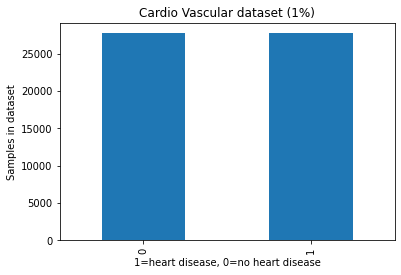

In [24]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [25]:
X_train = df_oversampler
y_train = df_oversampler_y

In [26]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  69319  15985       1     168    62.0    120     80            1     1   
1  61145  19070       1     155    92.0    140     90            2     1   
2  63264  18094       1     154    73.0    110     70            1     1   
3  55685  18975       1     164    52.0    120     80            1     1   
4  22848  15971       2     162    80.0    120     80            1     1   

   smoke  alco  active  
0      0     0       1  
1      0     0       0  
2      0     0       1  
3      0     0       0  
4      0     0       1

In [27]:
X_test.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
31214  88944  18774       1     164    64.0    130     80            1     1   
16247  46059  23206       2     167    71.0    110     60            1     1   
20381  58092  16578       1     157    85.0    120     80            1     3   
32326  92271  20625       2     168    72.0    120     80            1     1   
30416  86625  19757       1     150    65.0    130     70            2     1   

       smoke  alco  active  
31214      0     0       1  
16247      0     0       1  
20381      0     0       1  
32326      0     0       1  
30416      0     0       1

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     27743
           1       0.72      0.70      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      6936
           1       0.02      0.58      0.04        72

    accuracy                           0.72      7008
   macro avg       0.51      0.65      0.44      7008
weighted avg       0.98      0.72      0.83      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.777


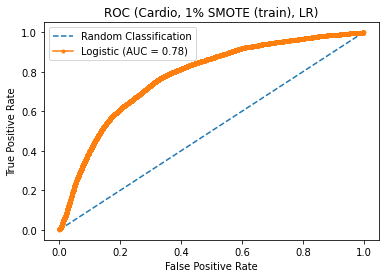

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.726


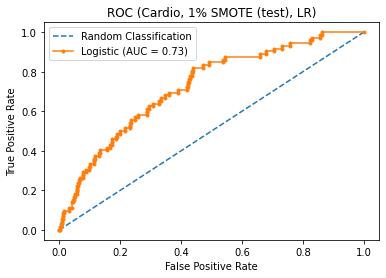

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     27743
           1       0.79      0.85      0.82     27743

    accuracy                           0.81     55486
   macro avg       0.82      0.81      0.81     55486
weighted avg       0.82      0.81      0.81     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6936
           1       0.02      0.36      0.03        72

    accuracy                           0.78      7008
   macro avg       0.50      0.57      0.45      7008
weighted avg       0.98      0.78      0.87      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.894


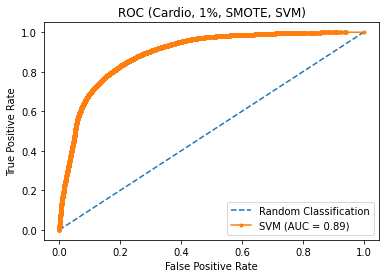

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.629


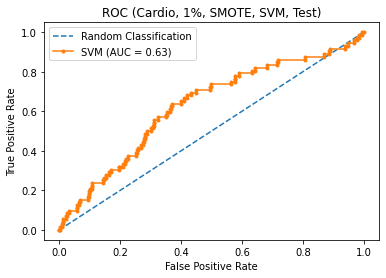

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.19423	validation_0-logloss:0.65337	validation_1-error:0.18565	validation_1-logloss:0.65399
[1]	validation_0-error:0.16258	validation_0-logloss:0.61522	validation_1-error:0.12557	validation_1-logloss:0.61622
[2]	validation_0-error:0.16498	validation_0-logloss:0.58343	validation_1-error:0.11701	validation_1-logloss:0.58474
[3]	validation_0-error:0.16330	validation_0-logloss:0.56034	validation_1-error:0.12657	validation_1-logloss:0.56177
[4]	validation_0-error:0.17610	validation_0-logloss:0.53439	validation_1-error:0.17623	validation_1-logloss:0.53709
[5]	validation_0-error:0.17287	validation_0-logloss:0.51387	validation_1-error:0.17337	validation_1-logloss:0.51642
[6]	validation_0-error:0.16128	validation_0-logloss:0.49624	validation_1-error:0.12657	validation_1-logloss:0.49800
[7]	validation_0-error:0.16168	validation_0-logloss:0.47673	validation_1-error:0.15996	validation_1-logloss:0.48028
[8]	validation_0-error:0.15224	validation_0-logloss:0.46269	validation_1

[71]	validation_0-error:0.08370	validation_0-logloss:0.22940	validation_1-error:0.07163	validation_1-logloss:0.24111
[72]	validation_0-error:0.08346	validation_0-logloss:0.22785	validation_1-error:0.07192	validation_1-logloss:0.23990
[73]	validation_0-error:0.08310	validation_0-logloss:0.22642	validation_1-error:0.07178	validation_1-logloss:0.23853
[74]	validation_0-error:0.08258	validation_0-logloss:0.22533	validation_1-error:0.07178	validation_1-logloss:0.23778
[75]	validation_0-error:0.08253	validation_0-logloss:0.22487	validation_1-error:0.07149	validation_1-logloss:0.23764
[76]	validation_0-error:0.08247	validation_0-logloss:0.22440	validation_1-error:0.07192	validation_1-logloss:0.23735
[77]	validation_0-error:0.08170	validation_0-logloss:0.22263	validation_1-error:0.06978	validation_1-logloss:0.23522
[78]	validation_0-error:0.08121	validation_0-logloss:0.22119	validation_1-error:0.06906	validation_1-logloss:0.23375
[79]	validation_0-error:0.08103	validation_0-logloss:0.22082	val

[141]	validation_0-error:0.05863	validation_0-logloss:0.16778	validation_1-error:0.05337	validation_1-logloss:0.18965
[142]	validation_0-error:0.05825	validation_0-logloss:0.16748	validation_1-error:0.05308	validation_1-logloss:0.18955
[143]	validation_0-error:0.05769	validation_0-logloss:0.16643	validation_1-error:0.05265	validation_1-logloss:0.18860
[144]	validation_0-error:0.05762	validation_0-logloss:0.16628	validation_1-error:0.05265	validation_1-logloss:0.18858
[145]	validation_0-error:0.05681	validation_0-logloss:0.16479	validation_1-error:0.05223	validation_1-logloss:0.18733
[146]	validation_0-error:0.05641	validation_0-logloss:0.16379	validation_1-error:0.05194	validation_1-logloss:0.18655
[147]	validation_0-error:0.05610	validation_0-logloss:0.16348	validation_1-error:0.05223	validation_1-logloss:0.18646
[148]	validation_0-error:0.05527	validation_0-logloss:0.16239	validation_1-error:0.05208	validation_1-logloss:0.18561
[149]	validation_0-error:0.05518	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27743
           1       0.97      0.95      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6936
           1       0.02      0.07      0.03        72

    accuracy                           0.96      7008
   macro avg       0.51      0.52      0.51      7008
weighted avg       0.98      0.96      0.97      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.994


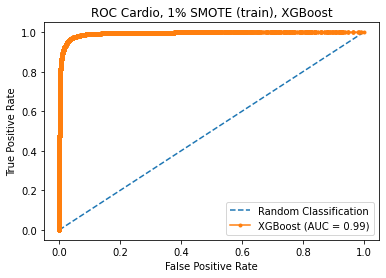

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.659


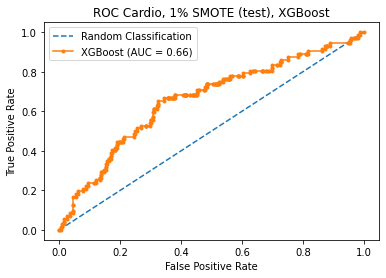

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1      288
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1      288
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
train_df_0_sm = tvae_result_df_0.sample(n = 500)
train_df_sm = train_df_0_sm.append(tvae_result_df_1)
train_df_sm['cardio'].value_counts()

0    500
1    288
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(train_df_sm)
samples = tvae.sample(400)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_sm,samples])
tvae_result_df['cardio'].value_counts()

0    500
1    317
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df)
samples = tvae.sample(500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm1 = pd.concat([tvae_result_df,samples])
tvae_result_df_sm1['cardio'].value_counts()

0    500
1    366
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm1)
samples = tvae.sample(500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm2 = pd.concat([tvae_result_df_sm1,samples])
tvae_result_df_sm2['cardio'].value_counts()

0    500
1    455
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm2)
samples = tvae.sample(600)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm3 = pd.concat([tvae_result_df_sm2,samples])
tvae_result_df_sm3['cardio'].value_counts()

1    550
0    500
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm3)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm4 = pd.concat([tvae_result_df_sm3,samples])
tvae_result_df_sm4['cardio'].value_counts()

1    690
0    500
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm4)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm5 = pd.concat([tvae_result_df_sm4,samples])
tvae_result_df_sm5['cardio'].value_counts()

1    1050
0     500
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm5)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm6 = pd.concat([tvae_result_df_sm5,samples])
tvae_result_df_sm6['cardio'].value_counts()

1    1152
0     500
Name: cardio, dtype: int64

In [47]:
tvae_result_df_sm_1 = tvae_result_df_sm6[tvae_result_df_sm6['cardio'] == 1]
train_df_0_smed = tvae_result_df_0.sample(n = 2500)
train_df_smed = train_df_0_smed.append(tvae_result_df_sm_1)
train_df_smed['cardio'].value_counts()

0    2500
1    1152
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(train_df_smed)
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
train_df_smed0 = pd.concat([train_df_smed,samples])
train_df_smed0['cardio'].value_counts()

0    2500
1    1652
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(train_df_smed0)
samples = tvae.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_smed1 = pd.concat([train_df_smed0,samples])
train_df_smed1['cardio'].value_counts()

0    2500
1    2477
Name: cardio, dtype: int64

In [50]:
tvae = TVAE()

tvae.fit(train_df_smed1)
samples = tvae.sample(3000)
samples = samples[samples['cardio'] ==1.0]
train_df_smed2 = pd.concat([train_df_smed1,samples])
train_df_smed2['cardio'].value_counts()

1    3531
0    2500
Name: cardio, dtype: int64

In [51]:
tvae_result_df_smed_1 = train_df_smed2[train_df_smed2['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 6000)
train_df_med = train_df_0_med.append(tvae_result_df_smed_1)
train_df_med['cardio'].value_counts()

0    6000
1    3531
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(train_df_med)
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
train_df_med0 = pd.concat([train_df_med,samples])
train_df_med0['cardio'].value_counts()

0    6000
1    5416
Name: cardio, dtype: int64

In [53]:
tvae = TVAE()

tvae.fit(train_df_med0)
samples = tvae.sample(5500)
samples = samples[samples['cardio'] ==1.0]
train_df_med1 = pd.concat([train_df_med0,samples])
train_df_med1['cardio'].value_counts()

1    9053
0    6000
Name: cardio, dtype: int64

In [54]:
tvae_result_df_med_1 = train_df_med1[train_df_med1['cardio'] == 1]
train_df_0_med1 = tvae_result_df_0.sample(n = 15000)
train_df_med_1 = train_df_0_med1.append(tvae_result_df_med_1)
train_df_med_1['cardio'].value_counts()

0    15000
1     9053
Name: cardio, dtype: int64

In [55]:
tvae = TVAE()

tvae.fit(train_df_med_1)
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_0 = pd.concat([train_df_med_1,samples])
train_df_med_1_0['cardio'].value_counts()

0    15000
1    13092
Name: cardio, dtype: int64

In [56]:
tvae = TVAE()

tvae.fit(train_df_med_1_0)
samples = tvae.sample(11000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_1 = pd.concat([train_df_med_1_0,samples])
train_df_med_1_1['cardio'].value_counts()

1    17398
0    15000
Name: cardio, dtype: int64

In [57]:
tvae = TVAE()

tvae.fit(train_df_med_1_1)
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_2 = pd.concat([train_df_med_1_1,samples])
train_df_med_1_2['cardio'].value_counts()

1    22969
0    15000
Name: cardio, dtype: int64

In [59]:
tvae_result_df_lg = train_df_med_1_2[train_df_med_1_2['cardio'] == 1]
train_df_lg_1 = tvae_result_df_0.append(tvae_result_df_lg)
train_df_lg_1['cardio'].value_counts()

0    27743
1    22969
Name: cardio, dtype: int64

In [60]:
tvae = TVAE()

tvae.fit(train_df_lg_1)
samples = tvae.sample(25000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg_1_1 = pd.concat([train_df_lg_1,samples])
train_df_lg_1_1['cardio'].value_counts()

1    34659
0    27743
Name: cardio, dtype: int64

In [62]:
tvae_result_df_1 = train_df_lg_1_1[train_df_lg_1_1['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    34659
Name: cardio, dtype: int64

In [67]:
tvae_result_df_0 = df_train[df_train['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [68]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [69]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

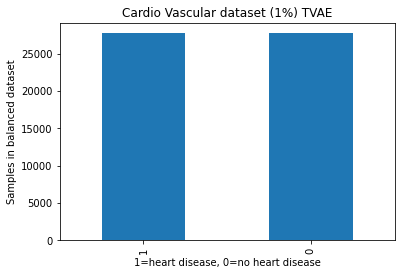

In [70]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [71]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [72]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     27743
           1       0.90      0.85      0.87     27743

    accuracy                           0.88     55486
   macro avg       0.88      0.88      0.88     55486
weighted avg       0.88      0.88      0.88     55486



In [73]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6936
           1       0.01      0.11      0.02        72

    accuracy                           0.90      7008
   macro avg       0.50      0.51      0.49      7008
weighted avg       0.98      0.90      0.94      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.925


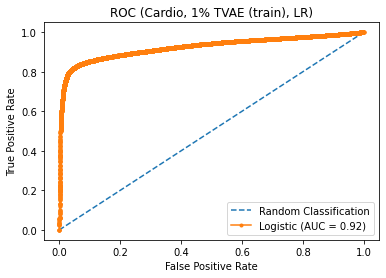

In [74]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.442


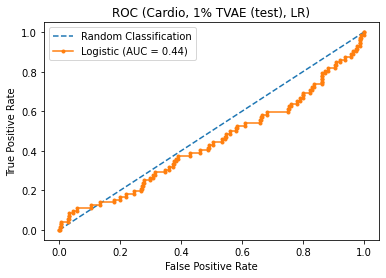

In [75]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [76]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27743
           1       0.99      0.97      0.98     27743

    accuracy                           0.98     55486
   macro avg       0.98      0.98      0.98     55486
weighted avg       0.98      0.98      0.98     55486



In [77]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6936
           1       0.05      0.04      0.05        72

    accuracy                           0.98      7008
   macro avg       0.52      0.52      0.52      7008
weighted avg       0.98      0.98      0.98      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.993


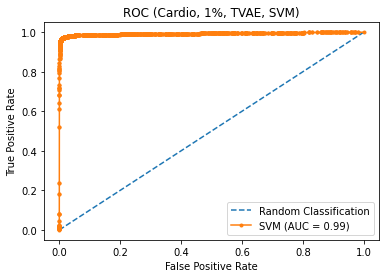

In [78]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.598


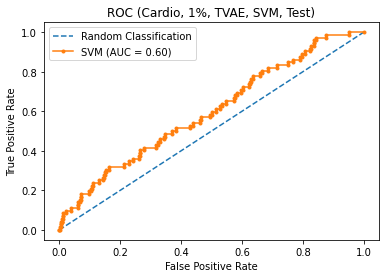

In [79]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [80]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.05794	validation_0-logloss:0.61457	validation_1-error:0.08590	validation_1-logloss:0.61577
[1]	validation_0-error:0.05794	validation_0-logloss:0.55000	validation_1-error:0.08590	validation_1-logloss:0.55240
[2]	validation_0-error:0.05892	validation_0-logloss:0.49598	validation_1-error:0.08590	validation_1-logloss:0.49939
[3]	validation_0-error:0.03722	validation_0-logloss:0.44790	validation_1-error:0.04423	validation_1-logloss:0.45193
[4]	validation_0-error:0.04024	validation_0-logloss:0.40884	validation_1-error:0.04423	validation_1-logloss:0.41359
[5]	validation_0-error:0.03705	validation_0-logloss:0.37338	validation_1-error:0.04438	validation_1-logloss:0.37865
[6]	validation_0-error:0.03655	validation_0-logloss:0.34269	validation_1-error:0.04538	validation_1-logloss:0.34823
[7]	validation_0-error:0.03941	validation_0-logloss:0.31621	validation_1-error:0.04167	validation_1-logloss:0.32187
[8]	validation_0-error:0.03651	validation_0-logloss:0.29352	validation_1

[71]	validation_0-error:0.01287	validation_0-logloss:0.04941	validation_1-error:0.01484	validation_1-logloss:0.07105
[72]	validation_0-error:0.01231	validation_0-logloss:0.04841	validation_1-error:0.01470	validation_1-logloss:0.07056
[73]	validation_0-error:0.01220	validation_0-logloss:0.04781	validation_1-error:0.01456	validation_1-logloss:0.07027
[74]	validation_0-error:0.01213	validation_0-logloss:0.04759	validation_1-error:0.01484	validation_1-logloss:0.07012
[75]	validation_0-error:0.01209	validation_0-logloss:0.04727	validation_1-error:0.01470	validation_1-logloss:0.06987
[76]	validation_0-error:0.01206	validation_0-logloss:0.04706	validation_1-error:0.01484	validation_1-logloss:0.06982
[77]	validation_0-error:0.01199	validation_0-logloss:0.04671	validation_1-error:0.01484	validation_1-logloss:0.06957
[78]	validation_0-error:0.01193	validation_0-logloss:0.04645	validation_1-error:0.01484	validation_1-logloss:0.06942
[79]	validation_0-error:0.01186	validation_0-logloss:0.04595	val

[141]	validation_0-error:0.00896	validation_0-logloss:0.03529	validation_1-error:0.01441	validation_1-logloss:0.06368
[142]	validation_0-error:0.00894	validation_0-logloss:0.03521	validation_1-error:0.01441	validation_1-logloss:0.06363
[143]	validation_0-error:0.00890	validation_0-logloss:0.03513	validation_1-error:0.01441	validation_1-logloss:0.06363
[144]	validation_0-error:0.00880	validation_0-logloss:0.03494	validation_1-error:0.01441	validation_1-logloss:0.06342
[145]	validation_0-error:0.00874	validation_0-logloss:0.03488	validation_1-error:0.01441	validation_1-logloss:0.06339
[146]	validation_0-error:0.00869	validation_0-logloss:0.03477	validation_1-error:0.01427	validation_1-logloss:0.06334
[147]	validation_0-error:0.00876	validation_0-logloss:0.03470	validation_1-error:0.01427	validation_1-logloss:0.06323
[148]	validation_0-error:0.00872	validation_0-logloss:0.03450	validation_1-error:0.01441	validation_1-logloss:0.06310
[149]	validation_0-error:0.00861	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       1.00      0.99      0.99     27743

    accuracy                           0.99     55486
   macro avg       0.99      0.99      0.99     55486
weighted avg       0.99      0.99      0.99     55486



In [82]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.998


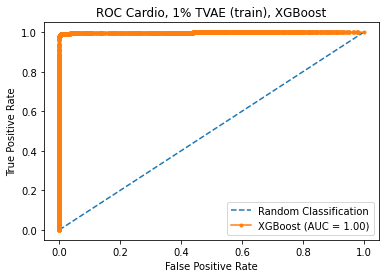

In [83]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.745


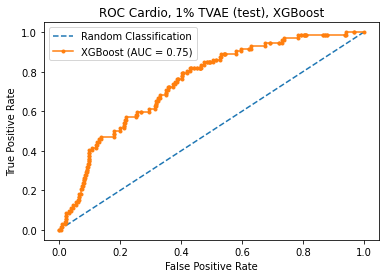

In [84]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [85]:
ctgan_df_1 = df_train[df_train['cardio'] == 1]
ctgan_df_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_df_0.sample(n = 500)
train_df_sm = ctgan_0_sm.append(ctgan_df_1)
train_df_sm['cardio'].value_counts()

0    500
1    288
Name: cardio, dtype: int64

In [87]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    206
Name: cardio, dtype: int64

In [88]:
train_df_sm1 = train_df_sm.append(samples)
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm2 = train_df_sm1.append(samples)

In [89]:
train_df_sm2['cardio'].value_counts()

1    1035
0     500
Name: cardio, dtype: int64

In [90]:
ctgan_0_sm1 = ctgan_df_0.sample(n = 2000)
ctgan_df_1_1 = train_df_sm2[train_df_sm2['cardio'] == 1]
ctgan_df_sm2 = ctgan_0_sm1.append(ctgan_df_1_1)
ctgan_df_sm2['cardio'].value_counts()

0    2000
1    1035
Name: cardio, dtype: int64

In [91]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1500)
samples = samples[samples['cardio'] ==1.0]
train_df_sm3 = ctgan_df_sm2.append(samples)
train_df_sm3['cardio'].value_counts()

0    2000
1    1569
Name: cardio, dtype: int64

In [93]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm4 = train_df_sm3.append(samples)
train_df_sm4['cardio'].value_counts()

1    2511
0    2000
Name: cardio, dtype: int64

In [94]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2200)
samples = samples[samples['cardio'] ==1.0]
train_df_sm5 = train_df_sm4.append(samples)
train_df_sm5['cardio'].value_counts()

1    3812
0    2000
Name: cardio, dtype: int64

In [95]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_sm6 = train_df_sm5.append(samples)
train_df_sm6['cardio'].value_counts()

1    5777
0    2000
Name: cardio, dtype: int64

In [96]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm7 = train_df_sm6.append(samples)
train_df_sm7['cardio'].value_counts()

1    8129
0    2000
Name: cardio, dtype: int64

In [97]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm7, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3200)
samples = samples[samples['cardio'] ==1.0]
train_df_sm8 = train_df_sm7.append(samples)
train_df_sm8['cardio'].value_counts()

1    10716
0     2000
Name: cardio, dtype: int64

In [98]:
ctgan_0_med = ctgan_df_0.sample(n = 13000)
ctgan_df_1_med = train_df_sm8[train_df_sm8['cardio'] == 1]
ctgan_df_med = ctgan_df_1_med.append(ctgan_0_med)
ctgan_df_med['cardio'].value_counts()

0    13000
1    10716
Name: cardio, dtype: int64

In [99]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med1 = ctgan_df_med.append(samples)
train_df_med1['cardio'].value_counts()

1    15195
0    13000
Name: cardio, dtype: int64

In [101]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(12000)
samples = samples[samples['cardio'] ==1.0]
train_df_med2 = train_df_med1.append(samples)
train_df_med2['cardio'].value_counts()

1    22075
0    13000
Name: cardio, dtype: int64

In [102]:
ctgan_0_lg = ctgan_df_0.sample(n = 20000)
ctgan_df_1_lg = train_df_med2[train_df_med2['cardio'] == 1]
ctgan_df_lg = ctgan_df_1_lg.append(ctgan_0_lg)
ctgan_df_lg['cardio'].value_counts()

1    22075
0    20000
Name: cardio, dtype: int64

In [103]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_lg, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(21000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = ctgan_df_lg.append(samples)
train_df_lg1['cardio'].value_counts()

1    35708
0    20000
Name: cardio, dtype: int64

In [104]:
ctgan_df_1 = train_df_lg1[train_df_lg1['cardio'] == 1]
train_df_1_bal = ctgan_df_1.sample(n = 27743)

In [105]:
ctgan_df_0 = df_train[df_train['cardio'] == 0]
df_train_bal = train_df_1_bal.append(ctgan_df_0)

In [106]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [107]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     27743
           1       0.77      0.72      0.75     27743

    accuracy                           0.75     55486
   macro avg       0.76      0.75      0.75     55486
weighted avg       0.76      0.75      0.75     55486



In [109]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      6936
           1       0.02      0.49      0.04        72

    accuracy                           0.77      7008
   macro avg       0.51      0.63      0.46      7008
weighted avg       0.98      0.77      0.86      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.818


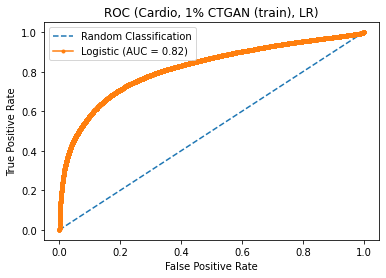

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.694


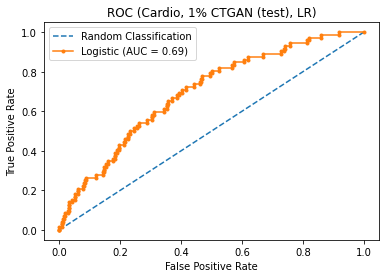

In [111]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     27743
           1       0.90      0.82      0.86     27743

    accuracy                           0.86     55486
   macro avg       0.87      0.86      0.86     55486
weighted avg       0.87      0.86      0.86     55486



In [113]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      6936
           1       0.02      0.24      0.04        72

    accuracy                           0.89      7008
   macro avg       0.51      0.57      0.49      7008
weighted avg       0.98      0.89      0.93      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.930


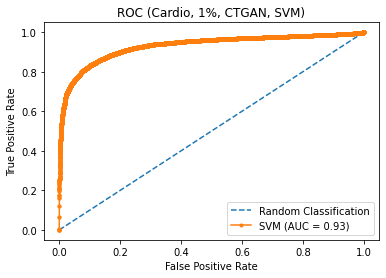

In [114]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.688


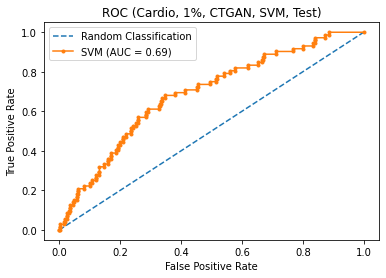

In [115]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [116]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [117]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13387	validation_0-logloss:0.63484	validation_1-error:0.13827	validation_1-logloss:0.63533
[1]	validation_0-error:0.10545	validation_0-logloss:0.58025	validation_1-error:0.07434	validation_1-logloss:0.58117
[2]	validation_0-error:0.08890	validation_0-logloss:0.54332	validation_1-error:0.08019	validation_1-logloss:0.54430
[3]	validation_0-error:0.06840	validation_0-logloss:0.50317	validation_1-error:0.05108	validation_1-logloss:0.50460
[4]	validation_0-error:0.06526	validation_0-logloss:0.47371	validation_1-error:0.06807	validation_1-logloss:0.47574
[5]	validation_0-error:0.06119	validation_0-logloss:0.44224	validation_1-error:0.05722	validation_1-logloss:0.44489
[6]	validation_0-error:0.06333	validation_0-logloss:0.41635	validation_1-error:0.07092	validation_1-logloss:0.41950
[7]	validation_0-error:0.06483	validation_0-logloss:0.39622	validation_1-error:0.06764	validation_1-logloss:0.39990
[8]	validation_0-error:0.05884	validation_0-logloss:0.37378	validation_1

[71]	validation_0-error:0.02988	validation_0-logloss:0.11310	validation_1-error:0.03710	validation_1-logloss:0.13396
[72]	validation_0-error:0.02970	validation_0-logloss:0.11184	validation_1-error:0.03667	validation_1-logloss:0.13298
[73]	validation_0-error:0.02952	validation_0-logloss:0.11031	validation_1-error:0.03610	validation_1-logloss:0.13195
[74]	validation_0-error:0.02961	validation_0-logloss:0.10948	validation_1-error:0.03639	validation_1-logloss:0.13127
[75]	validation_0-error:0.02931	validation_0-logloss:0.10885	validation_1-error:0.03639	validation_1-logloss:0.13076
[76]	validation_0-error:0.02940	validation_0-logloss:0.10751	validation_1-error:0.03596	validation_1-logloss:0.13001
[77]	validation_0-error:0.02922	validation_0-logloss:0.10694	validation_1-error:0.03582	validation_1-logloss:0.12960
[78]	validation_0-error:0.02903	validation_0-logloss:0.10652	validation_1-error:0.03596	validation_1-logloss:0.12930
[79]	validation_0-error:0.02891	validation_0-logloss:0.10567	val

[141]	validation_0-error:0.02293	validation_0-logloss:0.07794	validation_1-error:0.03154	validation_1-logloss:0.11008
[142]	validation_0-error:0.02294	validation_0-logloss:0.07777	validation_1-error:0.03168	validation_1-logloss:0.10996
[143]	validation_0-error:0.02289	validation_0-logloss:0.07754	validation_1-error:0.03168	validation_1-logloss:0.10980
[144]	validation_0-error:0.02273	validation_0-logloss:0.07718	validation_1-error:0.03168	validation_1-logloss:0.10980
[145]	validation_0-error:0.02262	validation_0-logloss:0.07699	validation_1-error:0.03168	validation_1-logloss:0.10955
[146]	validation_0-error:0.02251	validation_0-logloss:0.07661	validation_1-error:0.03182	validation_1-logloss:0.10940
[147]	validation_0-error:0.02244	validation_0-logloss:0.07652	validation_1-error:0.03154	validation_1-logloss:0.10938
[148]	validation_0-error:0.02244	validation_0-logloss:0.07633	validation_1-error:0.03182	validation_1-logloss:0.10920
[149]	validation_0-error:0.02238	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27743
           1       0.98      0.98      0.98     27743

    accuracy                           0.98     55486
   macro avg       0.98      0.98      0.98     55486
weighted avg       0.98      0.98      0.98     55486



In [119]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6936
           1       0.02      0.04      0.03        72

    accuracy                           0.97      7008
   macro avg       0.51      0.51      0.51      7008
weighted avg       0.98      0.97      0.97      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.996


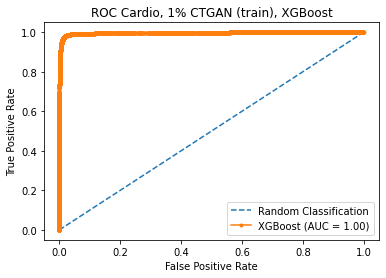

In [120]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.701


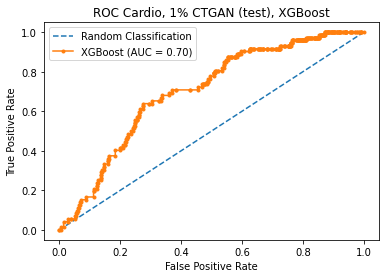

In [121]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()